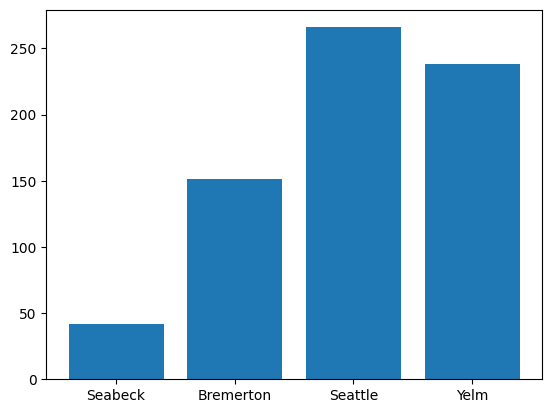

In [8]:
# Конвертация + гистограмма

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ds_path = os.path.abspath("") + "\datasets"
df = pd.read_csv(f"{ds_path}\\car_usa.csv")

df_head = df.head()
city = list(df_head["City"])
el_range = list(df_head["Electric Range"])

plt.bar(city, el_range)


df.to_excel("dataset_1.xlsx")


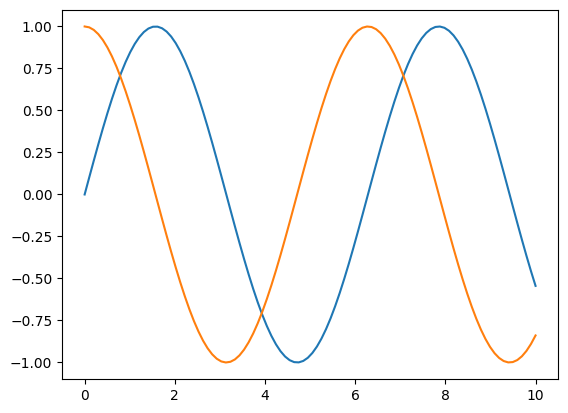

In [2]:
# График sin, cos

import matplotlib.pyplot as plt
import numpy as np

# %matplotlib inline
x= np.linspace(0, 10, 100)
y = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y, x, y2)

(array([  1.,   4.,  13.,  27.,  38.,  63.,  85., 117., 110., 136., 108.,
         98.,  82.,  51.,  37.,  13.,   9.,   7.,   0.,   1.]),
 array([ 6.88346102,  7.2173191 ,  7.55117717,  7.88503525,  8.21889333,
         8.55275141,  8.88660949,  9.22046757,  9.55432564,  9.88818372,
        10.2220418 , 10.55589988, 10.88975796, 11.22361604, 11.55747411,
        11.89133219, 12.22519027, 12.55904835, 12.89290643, 13.22676451,
        13.56062259]),
 <BarContainer object of 20 artists>)

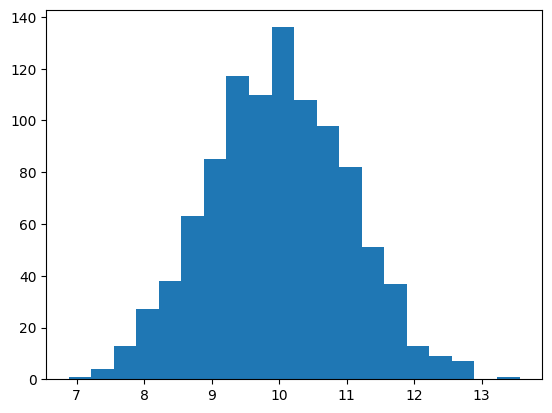

In [3]:
# Гистограмма нормального распределения

from scipy.stats import norm

x = np.random.normal(loc=10, size=1000)

x.sort()

plt.hist(x, bins=20)

0.7316582870430026


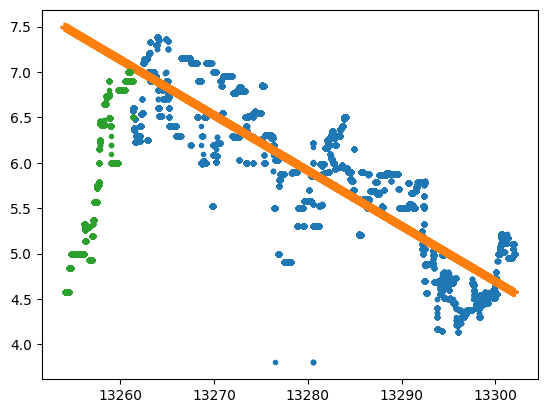

In [9]:
# Регрессионная модель

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

ds_path = os.path.abspath("") + "\datasets"
df = pd.read_csv(ds_path +  r"\bitcoin.csv")


df_cut = df[12000:80000]
date_ = df_cut["Timestamp"] / 100000
cost_ = df_cut["Open"]

Xa, Xb, Ya, Yb = train_test_split(date_, cost_, test_size=0.1, random_state=0)

plt.plot(Xa, Ya, ".")

Xa = np.reshape(Xa, (-1, 1))
Ya = np.reshape(Ya, (-1, 1))
Xb = np.reshape(Xb, (-1, 1))
Yb = np.reshape(Yb, (-1, 1))

model = LinearRegression()
model.fit(Xa, Ya)

print(model.score(Xb, Yb))

Xx = np.linspace(13254, 13302, 10000).reshape(-1, 1)

Yy = model.predict(Xx)

plt.plot(Xx, Yy, "+")


df_cut_past = df.head(12000)
date_ = df_cut_past["Timestamp"] / 100000
cost_ = df_cut_past["Open"]

plt.plot(date_, cost_, ".")

1.0


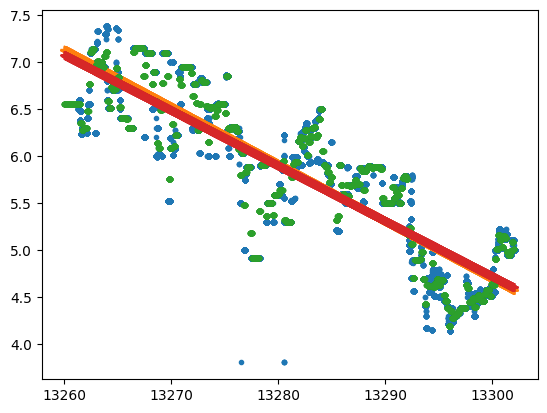

In [10]:
# XGBoost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression

#__________________________________________________
# Как работать с моделью
data_iris = load_iris()
X = data_iris.data
Y = data_iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=40)
XGtrain = xgb.DMatrix(X_train, label=Y_train)
XGtest = xgb.DMatrix(X_test, label=Y_test)

param_model = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'mlogloss'
}

learm_m = xgb.train(param_model, XGtrain, num_boost_round=10)
predict = learm_m.predict(XGtest)
accuracy = accuracy_score(Y_test, predict)
print(accuracy)

# _____________________________________________
# Сравнение с линейной регрессией
ds_path = os.path.abspath("") + "\datasets"
df = pd.read_csv(ds_path +  r"\bitcoin.csv")

df_cut = df[12000:80000]
# df_cut = df[:20000]
date_ = df_cut["Timestamp"] / 100000
cost_ = df_cut["Open"]
X_train, X_test, Y_train, Y_test = [np.reshape(x, (-1, 1)) for x in train_test_split(date_, cost_, test_size=0.1, random_state=0)]

plt.plot(X_train, Y_train, ".")

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)

X_prod = np.linspace(13260, 13302, 10000).reshape(-1, 1)

Y_prod = model_lr.predict(X_prod)
plt.plot(X_prod, Y_prod, "+")


XG_train = xgb.DMatrix(X_train, label=Y_train)
XG_test = xgb.DMatrix(X_test, label=Y_test)

param_model = {
    'objective': 'reg:squarederror',
    'max_depth': 50,
    'eta': 0.1,
}

model_xg = xgb.train(param_model, XG_train, num_boost_round=100)
predict = model_xg.predict(XG_test)
X_prod_xg = xgb.DMatrix(X_prod)
Y_prod_xg = model_xg.predict(X_prod_xg)
plt.plot(X_prod, Y_prod_xg, ".")


#_________________________________
# Регрессия на основе XBoost данных
X_train_2, X_test_2, Y_train_2, Y_test_2 = [np.reshape(x, (-1, 1)) for x in train_test_split(X_prod, Y_prod_xg, test_size=0.1, random_state=0)]

model_lr_2 = LinearRegression()
model_lr_2.fit(X_train_2, Y_train_2)

X_prod_2 = np.linspace(13260, 13302, 8887).reshape(-1, 1)

Y_prod_2 = model_lr_2.predict(X_prod_2)
plt.plot(X_prod_2, Y_prod_2, "+")


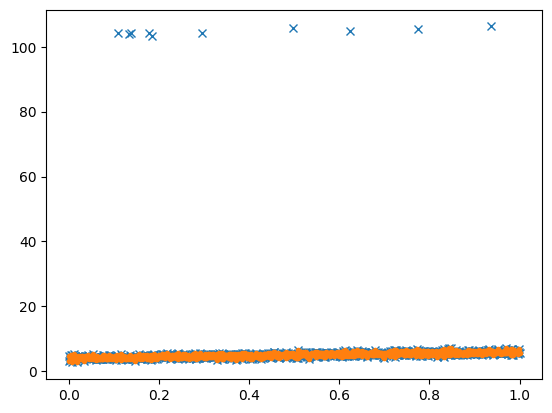

In [13]:
# Feature-engine 
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from feature_engine.outliers import OutlierTrimmer

def f(x, a ,b):
    y = a * x + b + np.random.normal(0, 0.5, len(x))
    y_ = (np.random. random(len(y)) > 0.99).astype(int) * 100

    return y + y_

x = np.linspace(0, 1, 1000)
y = f(x, 2, 4)

plt.plot(x, y, 'x')

outline_trim = OutlierTrimmer(capping_method='gaussian')
df = pd.DataFrame({'x': x, "y": y})

data_trim = outline_trim.fit_transform(df)

plt.plot(data_trim.x, data_trim.y, ".")
